# Chimera scripts: protein analysis
This <span style="color:rgba(255,100,0,1)"><b>Jupyter</b></span> notebook generates scripts to visualize a protein of interest in UCSF Chimera. The `protein.pdb` file needs to be first loaded into Chimera and inspected for features, secondary structures, and residue IDs of interest. Also, to position the protein for the best view, find the `move x dist` and `turn x deg` y, z, coordinates. Note and write those down. Image of the representation at the end of the script is saved to ~/Desktop in png format (can be changed in customized txt file).


Only a part of the script file is generated and a custom portion of the script is appended. Customize the script in files with extension *.txt and place this file to the ./Scripts directory.

The notebook is written in <span style="color:rgba(20,84,181,1)"><b>Python 3.6</b></span>.

<span><br></span>

In [1]:
# 1 Select folders for your data: 

# System
import os
import sys
import os.path
from pathlib import Path  # from Python 3.4 up

# iPython
import IPython
from IPython.core.display import HTML
from IPython.display import Image
#----- Check ipywidgets
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, Checkbox, AppLayout, GridspecLayout, Layout, VBox, HBox
from IPython.display import display, Math, Latex, Markdown
from IPython.display import Markdown as md

# Locate _modules directory
# p = Path(str(Path.cwd()))  # get the current path as a plain text
p = Path.cwd()  # get the current path
pa = widgets.Dropdown(
    options={
        'Notebook\'s current folder': p,  # add other custom path
    },
    value=p,
    description=' Data dir path :')

hep = widgets.HTML(
    value=
    "<div style='margin: 20px 20px;color: #3387CC;font-size: 1.6em'><b>Choose DATA path from the pull-down menu.</b> </div>"
)

custpa = widgets.Dropdown(
    options={
        'Fscripts':
        'F:/Computation/Chimera/Scripts',  # modify for your custom folder
        'datain': 'datain',  # typically in the notebook's folder
        'data': 'data'
    },
    value='F:/Computation/Chimera/Scripts',
    description=' Main script dir:')

hep = widgets.HTML(
    value=
    "<div style='margin: 20px 20px;color: #3387CC;font-size: 1.6em'><b>Choose DATA path from the pull-down menu.</b> </div>"
)

# Create 1 x 2 grid (one row, two columns)
gridPath = GridspecLayout(1,2)

# Fill it with widgets
gridPath[0,0] = pa
gridPath[0,1] = custpa

display(hep)
gridPath

HTML(value="<div style='margin: 20px 20px;color: #3387CC;font-size: 1.6em'><b>Choose DATA path from the pull-d…

GridspecLayout(children=(Dropdown(description=' Data dir path :', layout=Layout(grid_area='widget001'), option…

In [2]:
# 2 Set path and data_folder directories. Assumes the root folder `_Jupyter` : 
""" All notebook folders are under the root _Jupyter directory. Under this directory are also
folders `_css` and `modules`. The code finds the path to the _Jupyter directory and 
builds paths to different folders required for all notebooks.
"""

# Get the index of the _Jupyter folder higher in the directory tree
index_up = [i for i, s in enumerate(p.parts) if '_Jupyter' in s]
delta_up = len(p.parts) - index_up[0] - 2
_jupyter = p.parents[delta_up]  # path to _Jupyter folder in the current tree

modules = p.parents[delta_up].joinpath('_modules')  # path for _modules
css = str(p.parents[delta_up].joinpath('_css'))  # path to _css
sys.path.insert(1, str(modules))  # append _modules to path for easy imports

# If reusing the notebook across OS systems
if str(Path.home()) in str(pa.value):
    start_folder = Path.cwd().replace('\\', '/')
else:
    start_folder = str(pa.value).replace('\\', '/')

# Custom directory selected above
cust_folder = custpa.value
cust_dir = str(Path(cust_folder).resolve()).replace('\\', '/')

print("Variable `start_folder` point to: {:>40}".format(start_folder))
print("Variable `cust_folder` points to: {:>40}\n".format(str(cust_dir)))

Variable `start_folder` point to:     F:/_Jupyter/Chemoinformatics/Docking
Variable `cust_folder` points to:           F:/Computation/Chimera/Scripts



In [3]:
# Typical example of this notebook rendering 

display(
    HTML(
        "<table><tr><td><img src='./imgs/protein-contacts.png' alt='contact area' style='width: 400px;'></td> <td><img src='./imgs/protein-surf-contact.png', style='width: 400px;'></td></tr></table>"
    ))

,


In [4]:
#R 3 General imports and settings:  CONTINUE HERE 

# For time stamps
import datetime

#ANSI styling
# use as: print(reset + background_red + "Text")
bold = '\033[1m'
red = '\n' + '\033[31m'
blue = '\n' + "\033[94m"
green = '\n' + "\033[32m"
normal = '\n' + "\033[21m" + "\033[30m"
underline = '\n' + '\033[4m'
reset = '\033[0m'
background_blue = '\n' + '\033[38;2;255;255;0;48;2;0;0;255m'  #\033[38;2 r g b text, #[48;2 r g b  background
background_red = '\n' + '\033[38;2;255;255;255;48;2;198;0;0m'
background_red = '\n' + '\033[38;2;255;255;255;48;2;198;0;0m'


# Markdown and color printing
def printc(string, color=None):
    '''Use as:     printc("**bold and blue**", color="blue")
    '''
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))


def printwc(string, var, c1=None, c2=None):
    '''Use as:     printwc("**bold and blue**", var, c1="blue", c2="red")
    '''
    colorstr = "<span style='color:{}'>{}</span>".format(
        c1, string) + "<span style='color:{}'>{}</span>".format(c2, var)
    display(Markdown(colorstr))


def printmd(string):
    ''' use as: printmd('**BOLD TEXT**')
        equation_str = '$$c = \sqrt{a^2 + b^2}$$'
        printmd(f'Equation:\n{equation_str}')
    '''
    display(Markdown(string))

## Notebook Styling

In [5]:
# 2.0 Alternative Jupyter styling with table style reset and link to style sheet 

css_file = css + '/custom_ptt.css'
HTML(open(css_file, "r").read())

In [6]:
#O 2.1 Styling ipywidgets 


CSS = """
body {
    margin: 0;
    font-family: Helvetica;
}
.widget-select {
    width: 500px;
}
.widget-inline-hbox .widget-label {
width: unset
}
.widget-textarea, .widget-text {
    width: 500px;
}
.rendered_html table {
font-size: 14px !important;
font-family: monospace;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [7]:
# Run (once) to allow a nice html output as report (optional) 


"""
Hide code cells in an IPython notebook or exported HTML using javascript. 
Taken from Max Masnick's answer in 
http://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer.
"""

import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area, .output_stderr").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

CSS = """.input_area .output_stderr {height: 2.0em; overflow: hidden}""" #changes input_subarea width to 1 visible line
HTML('<style>{}</style>'.format(CSS))

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Click in rendered .html output only, toggles the code</button>''', raw=True)

Click in rendered .html output only, toggles the code

___

<h3>Enter location of file directories <span class='label label-info'>FILE PATHS</span></h3>

In [8]:
# Path to project 'root_dir/' data directory 
#F:/Business/Clients/Client4/ACE2/
#F:/Business/Clients/Client4/CD44_FERM/Computation/pep01_psar3_vina_smina/

root_dir = widgets.Text(
    value='F:/Business/Clients/Client4/ACE2',
    placeholder='F:/Business/Clients/Client4/ACE2',
    description='Folder:',
    layout=Layout(width='600px'),
    disabled=False)

display(root_dir)

Text(value='F:/Business/Clients/Client4/ACE2', description='Folder:', layout=Layout(width='600px'), placeholde…

In [9]:
# Sub-path to 'proteinP' data 'directory' 

proteinP = widgets.Text(
    value='structures',
    placeholder='structures',
    description='Folder:',
    disabled=False)

display(proteinP)

Text(value='structures', description='Folder:', placeholder='structures')

In [10]:
# Select protein file (proteins, protein_pdb) 

proteins = Path(root_dir.value) / Path(proteinP.value)
printwc(
    "**Searching directory** for *.pdb files ", proteins, c1="blue", c2="navy")

a = Path(proteins).glob("*.pdb")
# print(a)

result_files = []
result_files += [each.name for each in a]
# print(f"\nResult list \n{result_files}")

protein_pdb = widgets.Dropdown(
    options=result_files,
    value=result_files[0],
    description='Select:',
    disabled=False,
)
display(protein_pdb)

<span style='color:blue'>**Searching directory** for *.pdb files </span><span style='color:navy'>F:\Business\Clients\Client4\ACE2\structures</span>

Dropdown(description='Select:', options=('6m17.pdb', 'ACE2_fixed.pdb', 'ACE2_hel.pdb', 'RBD.pdb'), value='6m17…

And now change to the project (custom) directory.

In [11]:
%cd $cust_folder

F:\Computation\Chimera\Scripts


___
<span style="font-size: large" class='label label-success'>Enter variables of the Chimera script</span>

In [12]:
#E Enter custom suffix ('title') in the final .py script 

title = widgets.Text(
    value='contact',
    placeholder='contact',
    description='Title:',
    layout=Layout(width='250px'),
    disabled=False)

display(title)

Text(value='contact', description='Title:', layout=Layout(width='250px'), placeholder='contact')

The following set of widgets allows selection and definition of residues, chains, and aliases for the best representation of the protein features. 

If the protein has multiple chains or segments, the script will split the model into sub-models. Selects those that you want to keep and those that can be closed. In order to identify sub-model IDs, `Open` the protein.pdb file in **Chimera** and in the Command line, type `split` and then press Enter. Inspect the sub-models and record their numbers (typically, 0.1, 0.2 .. 0.9). With the protein displayed, note what segments you want to focus on and residues that you can give aliases to. Also note the residues and ranges that can be deleted to achive better visual effect. If there are residues that make a contact and you wish to illustrate it, note those segments as `contacts1` and `contacts2`. 

<div class='alert alert-info'>
<b>NOTE:</b> Any of the following information is optional. If residue ID is entered incorrectly, Chimera will ignore the entry.<br> <b>However, fill the fields for submodels that you want to keep and delete</b>.
</div>

In [13]:
# Select and highlight features? 

subK = widgets.Text(
    value='0.4,0.6',
    placeholder='0.4,0.6',
    description='<span style="color:green"> Which submodels to keep?</span>',
    layout=Layout(width='250px'),
    disabled=False)

subC = widgets.Text(
    value='0.1-3,0.5',
    placeholder='0.1-3,0.5',
    description='<span style="color:red"> Which submodels to close?</span>',
    layout=Layout(width='250px'),
    disabled=False)

mergeM = widgets.Checkbox(
    value=False,
    description='Merge the active models?',
    disabled=False,
    indent=False)

contactA = widgets.Checkbox(
    value=False,
    description='Show the contact area?',
    disabled=False,
    indent=False)

intS = widgets.Checkbox(
    value=False,
    description='Show interaction surface?',
    disabled=False,
    indent=False)

alias1L = widgets.Dropdown(
    options=['helix1', 'strand1', 'segment1'],
    value='helix1',
    description=' Alias1:',
    layout=Layout(width='150px'),
    disabled=False,
)

alias1 = widgets.Text(
    value='0.4:21-52.D',
    placeholder='0.4:21-52.D',
    description='Select res1',
    layout=Layout(width='300px'),
    indent=True,
    disabled=False)

alias2L = widgets.Dropdown(
    options=['helix2', 'strand2', 'segment2'],
    value='helix2',
    description=' Alias2:',
    layout=Layout(width='150px'),
    disabled=False,
)

alias2 = widgets.Text(
    value='0.4:58-89.D',
    placeholder='0.4:58-89.D',
    description='Select res2',
    layout=Layout(width='300px'),
    indent=True,
    disabled=False)

alias3 = widgets.Text(
    value='0.4:24.D,27.D,30.D,31.D,34.D,35.D,37.D,38.D,41.D,45.D',
    placeholder='0.4:24.D,27.D,30.D,31.D,34.D,35.D,37.D,38.D,41.D,45.D',
    description='contacts1',
    layout=Layout(width='350px'),
    indent=True,
    disabled=False)

alias4 = widgets.Text(
    value=
    '0.6:449.F,453.F,455.F,456.F,475.F,476.F,487.F,489.F,493.F,496.F,498.F,500.F,501.F',
    placeholder=
    '0.6:449.F,453.F,455.F,456.F,475.F,476.F,487.F,489.F,493.F,496.F,498.F,500.F,501.F',
    description='contacts2',
    layout=Layout(width='350px'),
    indent=True,
    disabled=False)

delC = widgets.Text(
    value='0.4:90-323.D,362-767.D',
    placeholder='0.4:90-323.D,362-767.D',
    description=
    '<span style="color:darkred">Delete part(s) of the retained chain(s)? </span>',
    indent=True,
    disabled=False)

resP = widgets.Checkbox(
    value=False,
    description='Highlite sc residue(s)?',
    disabled=False,
    indent=False)

resP_id = widgets.Text(
    value=':34',
    placeholder=':34',
    description='res ID:',
    disabled=False,
    layout=Layout(width='200px'))

labcol = widgets.Dropdown(
    options=['black', 'gold', 'blue', 'hot pink'],
    value='gold',
    description='Label color:',
    layout=Layout(width='200px'),
    disabled=False,
)

rmlab = widgets.Checkbox(
    value=False,
    description='Remove all labels?',
    disabled=False,
    indent=False)

# Create 8 x 3 grid (eight rows, three columns)
gridOpt = GridspecLayout(8,3)

# CSS type dividers
divider1 = widgets.HTML(
    value=
    "<div style='margin-top: 15px; border-bottom: 1px dashed gray'></div>"
)
divider2 = widgets.HTML(
    value=
    "<div style='margin-top: 15px; border-bottom: 1px dashed gray'></div>"
)

# Fill it with widgets
gridOpt[0,0] = subK
gridOpt[0,1] = alias1L
gridOpt[0,2] = alias2L
gridOpt[1,0] = subC
gridOpt[1,1] = alias1
gridOpt[1,2] = alias2
gridOpt[2,:] = divider1
gridOpt[3,0] = mergeM
gridOpt[3,1] = intS
gridOpt[3,2] = contactA
gridOpt[4,:] = delC
gridOpt[5,:] = divider2
gridOpt[6,0] = labcol
gridOpt[6,1] = resP
gridOpt[6,2] = alias3
gridOpt[7,0] = rmlab
gridOpt[7,1] = resP_id
gridOpt[7,2] = alias4

# Set the layout properties
gridOpt[4,:].layout.width = '95%'
gridOpt[2,:].layout.width = '100%'
gridOpt[5,:].layout.width = '100%'

gridOpt

GridspecLayout(children=(Text(value='0.4,0.6', description='<span style="color:green"> Which submodels to keep…

Since it is quite complex to script every detail of the visualization, model-specific parameters, such as orientation or zoom are placed into a plain text file. Inspect the file and select its name below.

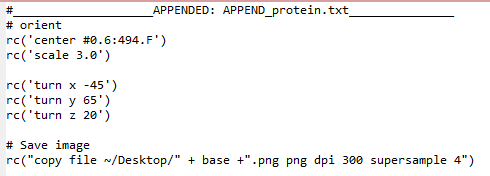

In [14]:
Image(filename=start_folder + '/imgs/chimera-append.png')

In [15]:
# Select the name of customized (and appended) part of the scripts (cust_txt) 

cust_part = Path(cust_folder)
printwc(
    "**Searching directory** for customized *.txt files ",
    cust_part,
    c1="blue",
    c2="navy")

b = Path(cust_part).glob("*.txt")
# print(b)

result_files = []
result_files += [each.name for each in b]

cust_txt = widgets.Dropdown(
    options=result_files,
    value=result_files[0],
    description='Select:',
    disabled=False,
)
display(cust_txt)

<span style='color:blue'>**Searching directory** for customized *.txt files </span><span style='color:navy'>F:\Computation\Chimera\Scripts</span>

Dropdown(description='Select:', options=('APPEND_protein.txt', 'APPEND_surf_bind_site_lig.txt', 'APPEND_surf_b…

<span style="font-size: large" class='label label-info'>Build the script</span>

In [16]:
# Create variables for filenames in the scipt 

in1 = Path(protein_pdb.value).stem + "_" + str(title.value) + ".py"
in2 = cust_txt.value
out = Path(protein_pdb.value).stem + "_" + str(title.value) + "_Run.py"

In [17]:
#E Enter a meaningfull description of the script file (-> describe) 

# Time stamp
today = datetime.date.today()

describe = "# Script description" + "\n" \
    "# __Author__    Marcel Patek" + "\n" \
    "# __Date__      " + str(today) + "\n" \
    "# The script `"+out+"` generates details of one subunit of Cov-2/ACE2 complex and " \
    "possible interaction sites." + "\n" \
    "# The `" + protein_pdb.value +"` file complex is split in Chimera and fragments F, D are kept " \
    "as sub-models." + "\n" \
    "# This autogenerated script appends file: " + in2 + "\n" \
    "# Run in Chimera from the Command line as: >run "+ out + "\n\n"

print(describe, sep='\n')

# Script description
# __Author__    Marcel Patek
# __Date__      2020-04-26
# The script `6m17_contact_Run.py` generates details of one subunit of Cov-2/ACE2 complex and possible interaction sites.
# The `6m17.pdb` file complex is split in Chimera and fragments F, D are kept as sub-models.
# This autogenerated script appends file: APPEND_protein.txt
# Run in Chimera from the Command line as: >run 6m17_contact_Run.py




In [18]:
# Chimera commands for opening files, protein prep, and options 

# general imports and initialization
a = "import os" +"\n" \
"from chimera import runCommand as rc # use 'rc' as shorthand for runCommand"+ "\n" \
"from chimera import replyobj # for emitting status messages" + "\n\n"

# Set the path to project 'root' directory
b = "# Set the parent folder of data files with '/' at the end" + "\n" \
"os.chdir('" + str(root_dir.value) + "')" + "\n\n"

# Load the protein and get the base name for image output
c = "# Load the protein and get the base name for image output" + "\n" \
+ "protein = '" + str(proteins / protein_pdb.value).replace('\\','/') + "'\n" \
+ "file = os.path.split(protein)[1]\n" \
+ "base = file[:-4]\n"

# Set general options
d = "#___ Options" + "\n" \
"#rc('preset apply pub 1') #  a publication preset including white backg, black outlines, and increased smoothness" + "\n" \
"# Labels" + "\n" \
"rc('labelopt resinfo %(1-letter code)s%(number)s')" +"\n" \
"# Enable keyboard shortcuts" + "\n" \
"rc('ac')" + "\n" \
"# Set rendering" + "\n" \
"rc('represent wire #0') # show protein as wire" + "\n" \
"# Custom colors" + "\n" \
"rc('colordef goldie 1 0.762 0 1')" + "\n" \
"rc('colordef bluish 0.381 0.619 1 1')" + "\n" \
"rc('colordef labels 1 0 0.762 1')" + "\n" \
"# Open clipping panel and Distance panel" + "\n" \
"rc('start Side View')" + "\n" \
"#rc('start Distances')" + "\n" \
"#_____________________________________________________" + "\n\n"

# Load the protein and ligand
e = "# Load the protein to Chimera" + "\n" \
"rc('open ' + protein) # as model #0" + "\n" \
"rc('preset apply interactive 1') # change later by keyboard c2"  + "\n\n"

# Clean up the protein
f = "# Clean up the protein" + "\n" \
"rc('~longbond') # remove dashed lines in discontinued protein segments" + "\n" \
"rc('delete solvent')" + "\n" \
"rc('~display ions')" + "\n" \
"rc('~show ::NAG') # hide suggars" + "\n" \
"rc('~display #0') # hide any side-chain residues" + "\n" \
"rc('del @ZN') # Delete Zinc atoms (if any)" + "\n\n"

In [19]:
# Commands for rendering ligand+protein 

g = "# Split the model to sub-models and close those that are not needed" + "\n" \
"rc('split')" + "\n" \
"rc('close #" + str(subC.value).replace(" ","") + "') # close sub-models" + "\n" \
"rc('del #" + str(delC.value).replace(" ","") + "') # delete part of the kept chain" + "\n" \
"rc('~show ::NAG') # hide suggars (if any)" + "\n\n"

h = "# Make aliases and color segments" + "\n" \
"rc('alias " + str(alias1L.value) + " #" +  str(alias1.value).replace(" ","") + "')" + "\n" \
"rc('alias " + str(alias2L.value) + " #" +  str(alias2.value).replace(" ","") + "')" + "\n" \
"rc('alias contacts1 #" +  str(alias3.value).replace(" ","") + "')" + "\n" \
"rc('alias contacts2 #" +  str(alias4.value).replace(" ","") + "')" + "\n" \
"rc('color goldie " + str(alias1L.value) + "')" + "\n" \
"rc('color bluish " + str(alias2L.value) + "')" + "\n" \
"rc('color gray coil')" + "\n\n"

# This segments stays with no variables
i = "# Render residues" + "\n" \
"rc('select contacts1 | contacts2')" + "\n" \
"rc('display sel')" + "\n" \
"rc('repr wire sel')" + "\n" \
"rc('color byelement sel')" + "\n" \
"rc('~select')" + "\n" \
"rc('rlabel contacts1 | contacts2')" + "\n" \
"rc('color labels,lr')" + "\n" \
"# rc('~display ~ :B') # hide residue bonds?" + "\n" \
"# Set protein rendering to wire" + "\n" \
"rc('represent wire protein')" + "\n" \
"# Change Label color globally" + "\n" \
"rc('color " + str(labcol.value) +",l protein')" + "\n\n"

# Merge the submodels for interactions?
if mergeM.value == True:
    j = "# Optional - Merge the sub-models to allow display of interactions" + "\n" \
"rc('select #" + str(subK.value).replace(" ","").split(",")[0]+" #"+str(subK.value).replace(" ","").split(",")[1]+ "')" + "\n" \
"rc('combine sel refSpec #"+ str(subK.value).replace(" ","").split(",")[1] + " modelID #1 newchainids 0 name mergedDF')" + "\n" \
"rc('~select')" + "\n" \
"rc('alias contacts1 #1" +  str(alias3.value).replace(" ","")[3:] + "')" + "\n" \
"rc('alias contacts2 #1" +  str(alias4.value).replace(" ","")[3:] + "')" + "\n" \
"rc('~surface') # remove surfaces if displayed" + "\n"
else:
    j = ""

# Display contact areas?
if contactA.value == True:
    k = "# Optional - generate contact area of protein chains" + "\n" \
"rc('measure buriedArea  #" + str(subK.value).replace(" ","").split(",")[0]+" #"+str(subK.value).replace(" ","").split(",")[1]+ "')" + "\n" \
"rc('color yellow  #" +str(subK.value).replace(" ","").split(",")[0] + "@/buriedSESArea>1')" + "\n" \
"rc('color hot pink  #" + str(subK.value).replace(" ","").split(",")[1] + "@/buriedSESArea>1')" + "\n" \
"rc('surface')" + "\n" \
"rc('~surface #0.4') # hide one of the surfaces" + "\n"
else:
    k = ""

# Interface surface
if intS.value == True:
    l = "# Generate Interface surface" "\n" \
"rc('~surface')" + "\n" \
"rc('represent wire #" + str(subK.value).replace(" ","").split(",")[0]+" #" + str(subK.value).replace(" ","").split(",")[1]+"')" + "\n" \
"rc('intersurf #" + str(subK.value).replace(" ","").split(",")[0]+" #" + str(subK.value).replace(" ","").split(",")[1]+" select true prune 10')" + "\n" \
"rc('repr bs sel')" + "\n" \
"rc('color byelement sel')" + "\n" \
"rc('setattr m stickScale 0.5 sel')" + "\n" \
"rc('setattr m ballScale 0.15')" + "\n" \
"rc('~select')" + "\n"
else:
    l = ""

# Highlight specific protein residues?
if resP.value == True:
    m = "# Feature highlight" + "\n" \
"rc('select #"+ str(resP_id.value).replace(" ","").split(",")[0] +"') # or a range of residues,e.g, :248-250" + "\n" \
"rc('display sel')" + "\n" \
"rc('repr wire sel') # or repr bs sel" + "\n" \
"rc('rlabel sel')" + "\n" \
"rc('represent bs sel')" + "\n" \
"rc('setattr m stickScale 0.52 sel')" + "\n" \
"rc('setattr m ballScale 0.1')" + "\n" \
"rc('color red,a sel')    # colors residue but not surface" + "\n" \
"rc('~display HC')" + "\n" \
"rc('~select')" + "\n\n"
else:
    m = ""

n = ""

# Remove all label for publication?
if rmlab.value == True:
    o = "\nrc('~rlabel') # remove all labels" + "\n"
else:
    o = "\n\n"

In [75]:
# Generate and save Chimera initialization script 

lines_of_text = [a, describe, b, c, d, e, f, g, h, i, j, k, l, m, n, o]

try:
    fh = open(cust_dir + "/" + Path(protein_pdb.value).stem + "_" +
              title.value + ".py", "w")
    lines_of_text
    fh.writelines(lines_of_text)
    fh.close()
    printwc(
        "**The script file was created:** ",
        cust_dir + "/" + Path(protein_pdb.value).stem + "_" + title.value +
        ".py",
        c1="green",
        c2='navy')
except:
    printc("**The script generation failed**.", color="red")

<span style='color:green'>**The script file was created:** </span><span style='color:navy'>F:/Computation/Chimera/Scripts/6m17_contact.py</span>

___
Use `cat` in `bash magic` to concatenate the customized script file to the initialization script. Also removes the auxiliary <span style="color:rgba(255,100,0,1)"><b>{{scr_name}}</b></span> file.

On Windows it only runs with `Git bash` installed and set in `PATH` in Environmet variables like ` e:\Program Files\Git\cmd `.

In [76]:
%%bash -s "$in1" "$in2" "$out" 
cat $1 $2 > $3
rm $1
rm *.pyc
echo "Show 'Run' files in Script directory:"
echo
ls --sort=time --color | grep "Run"

Show 'Run' files in Script directory:

6m17_contact_Run.py
6m17_ace_Run.py
MSN_present_Run.py


**Run the script file from Chimera GUI**

+  From File -> Open -> {{scr_name}}
+  From Command prompt in Chimera as: run {{scr_name}}

___
### Output html for archival purposes

In [13]:
%cd $start_folder

F:\_Jupyter\Chemoinformatics\Docking


In [86]:
# Create Notebook output with a template and timestamp. Input is removed 

from nbconvert import HTMLExporter
import codecs
from datetime import datetime

stamp = datetime.today().strftime("%Y-%m-%d_%H-%M-%S")

# other options are: full.tpl, report.tpl, report-code-opt.tpl
exporter = HTMLExporter(template_file='C:/Miniconda3/envs/main/Lib/site-packages/nbconvert/templates/html/report-code-opt.tpl')
output, resources = exporter.from_filename('Chimera-protein.ipynb')
codecs.open(os.path.join("reports", stamp+'_Chimera-protein_report.html'), 'w', encoding='utf-8').write(output)

In [15]:
!jupyter nbconvert Chimera-protein.ipynb --to html --template full.tpl --output Chimera-protein_report.html
# Works only on Linux or on Win with GitBash installed
# for plain report without code, add --no-input --no-promp

[NbConvertApp] Converting notebook Chimera-protein.ipynb to html
[NbConvertApp] Writing 1178374 bytes to Chimera-protein_report.html


In [88]:
# Delete 'print B&W' instruction in css/style section 

new_fnm = os.path.join("reports", stamp+'_Chimera-protein_report.html')
print(new_fnm)
program = open(new_fnm, "r")
lines = program.readlines()
program.close()

f = open(os.path.join("reports", stamp+'_Chimera-protein_report.html'), "w")

for line in lines:
    if not line.startswith('    color: #000 !important'):
        f.write(line)

f.close()
# os.remove(new_fnm)

reports\2020-04-26_12-16-00_Chimera-protein_report.html


### End of the notebook
_____

<span style="font-size: 12px"><i>Jupyter Notebook **Chimera-protein.ipynb**:<br>
version 1.0 created on April 17, 2020<br>
</i></span>